# Making the decline detection better

Building on top of our findings in milestone 2, we find a technique to better detect declines.

In [12]:
from src.data.dataloader_functions import *
from src.data.final_dataset_creation import *
from src.utils.results_utils import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Compute rolling growth rate

Compute the rolling growth rate and store it to file if it doesn't exist.

/!\ Note: Running the following cell is very time-consuming and requires around 16GB of memory. Run it only if you don't have the file `df_with_rgr.csv` in the `data` folder.

In [ ]:
compute_rolling_growth_rate()

## Detect declines

We now create the final dataset that we will use through this study, with a specific method for detecting declines by filterning them on the rolling growth rate percentage (intensity of the decline) and the duration of the decline:

Starting decline events dataset creation: 

Loading data from data/df_with_rgr_new.tsv ...
Data loaded. 

Total number of channels: 133516 

Detecting decline events ...


Processing channels: 100%|██████████| 133516/133516 [03:52<00:00, 574.01it/s]



Initial decline events detected. 



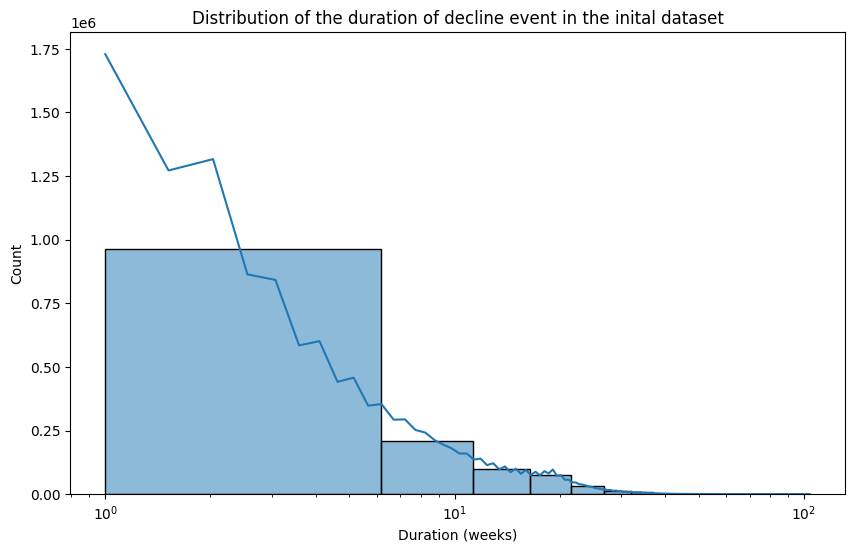

We detect way too many decline events, so we need to find a way to filter them.
We therefore set a threshold of 8 weeks for the minimum duration of a decline event. 

Filtering decline events with minimum duration of 8 weeks ...
Decline events filtered. 



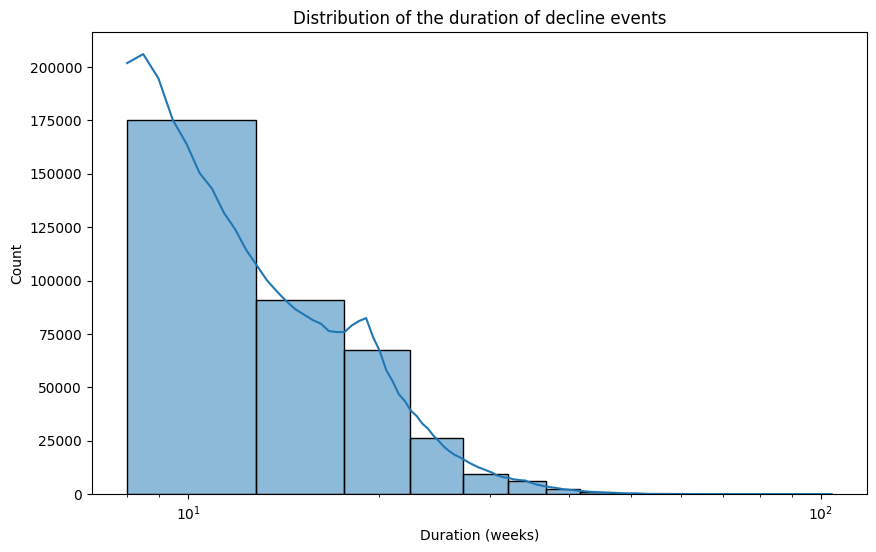


After filtering:
    Mean duration of decline events: 14.96952570075613
    Median duration of decline events: 13.0
    Min duration of decline events: 8
    Max duration of decline events: 104 

Filtering decline events with minimum growth difference percentage of -80 ...


Processing channels: 100%|██████████| 133516/133516 [01:11<00:00, 1879.93it/s]


Decline events filtered. 

Filtering decline events with minimum duration of 8 weeks ...
Decline events filtered. 

There are 121998 decline events (based on growth rate) with duration of at least 8 weeks. 

Number of channels with decline events detected after filtering: 65110 

Saving data to data/decline_events_complete.csv ...
Data saved. 

Decline events saved to data/decline_events_complete.csv 

Creating dataset for 1M Plus dataset (only channels in detected decline events) with more than 1M subscribers ...
1M Plus dataset created and saved to data/1M_plus_from_declined_events.csv 

Decline events dataset creation completed.


In [2]:
df_init_rgr_pct, df_init_rgr_pct_grouped, decline_events_final_sorted = create_decline_events_datasets()

## Explaination of the advantage of the filtered dataset

To illustrate the advantage of the filtered dataset, we will compare the results of the decline detection on the filtered dataset with the results of the decline detection on the original dataset for a well known youtuber with famous bad buzz that resulted in declines: Lance Stewart.

In [5]:
# Lance stewart channel ID
LANCE_STEWART  =  'UC6-NBhOCP8DJqnpZE4TNE-A'

Before applying filters to correctly detect decline, every red area in the following graph was a decline event:

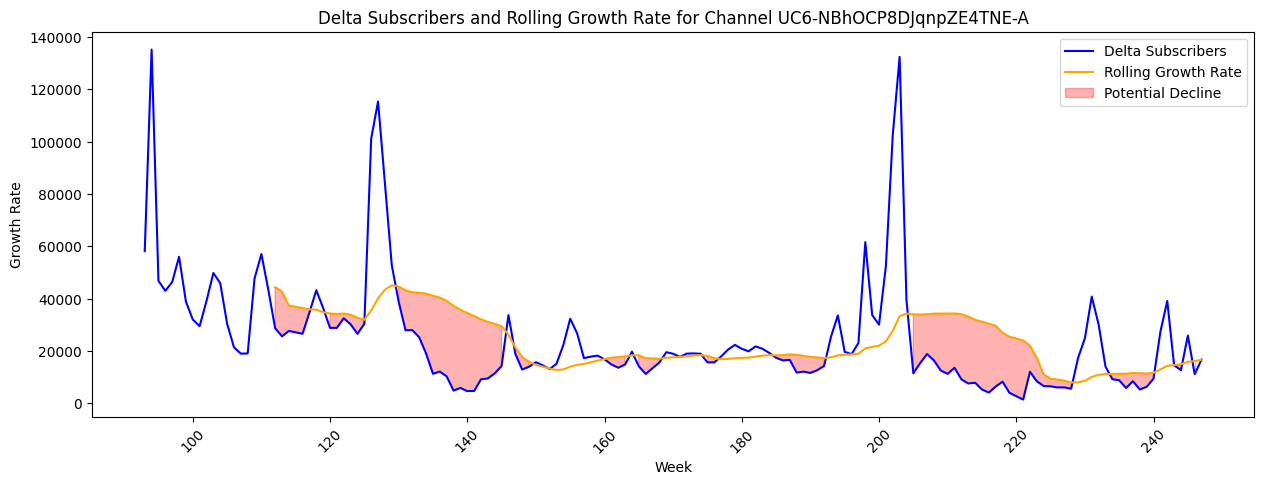

In [4]:
plot_rolling_growth_rate2(LANCE_STEWART, df_init_rgr_pct)

That detection was not very meaningful, as it detected a lot of small declines that were not significant and not correlated to real known decline periods of this youtuber's channel.

The filters applied to the dataset are the following:
- The rolling growth rate percentage must be below -80% (high intensity of the decline)
- The duration of the decline must be at least 8 weeks

After applying the filters, we obtain less decline events, but only the meaningful ones (shown in purple in the following graph):

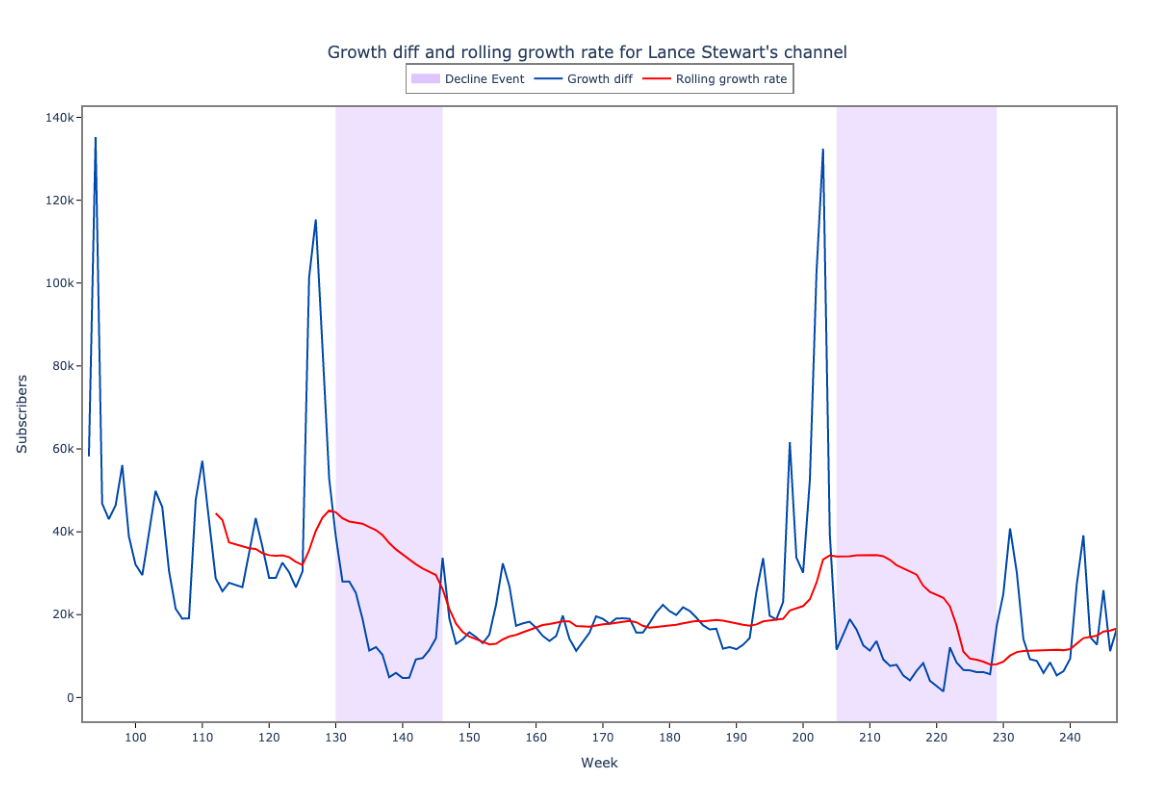

In [14]:
plot_new_detection(df_init_rgr_pct_grouped, decline_events_final_sorted, LANCE_STEWART)